In [2]:
import matplotlib.pyplot as plt

In [3]:
from HelmholtzSolver2D import *
from ExampleBoundaries import Square

In [4]:
def Square():
    aVertex = np.array([[0.00, 0.0000], [0.00, 0.0125], [0.00, 0.0250], [0.00, 0.0375],
                         [0.00, 0.0500], [0.00, 0.0625], [0.00, 0.0750], [0.00, 0.0875],
                         
                         [0.0000, 0.10], [0.0125, 0.10], [0.0250, 0.10], [0.0375, 0.10],
                         [0.0500, 0.10], [0.0625, 0.10], [0.0750, 0.10], [0.0875, 0.10],
                         
                         [0.10, 0.1000], [0.10, 0.0875], [0.10, 0.0750], [0.10, 0.0625],
                         [0.10, 0.0500], [0.10, 0.0375], [0.10, 0.0250], [0.10, 0.0125],
                         
                         [0.1000, 0.00], [0.0875, 0.00], [0.0750, 0.00], [0.0625, 0.00],
                         [0.0500, 0.00], [0.0375, 0.00], [0.0250, 0.00], [0.0125, 0.00]], dtype=np.float32)

    aEdge = np.array([[ 0,  1], [ 1,  2], [ 2,  3], [ 3,  4],
                      [ 4,  5], [ 5,  6], [ 6,  7], [ 7,  8],
                      
                      [ 8,  9], [ 9, 10], [10, 11], [11, 12],
                      [12, 13], [13, 14], [14, 15], [15, 16],
                      
                      [16, 17], [17, 18], [18, 19], [19, 20],
                      [20, 21], [21, 22], [22, 23], [23, 24],
                      
                      [24, 25], [25, 26], [26, 27], [27, 28],
                      [28, 29], [29, 30], [30, 31], [31,  0]], dtype=np.int32)

    return aVertex, aEdge

In [5]:
Square()

(array([[0.    , 0.    ],
        [0.    , 0.0125],
        [0.    , 0.025 ],
        [0.    , 0.0375],
        [0.    , 0.05  ],
        [0.    , 0.0625],
        [0.    , 0.075 ],
        [0.    , 0.0875],
        [0.    , 0.1   ],
        [0.0125, 0.1   ],
        [0.025 , 0.1   ],
        [0.0375, 0.1   ],
        [0.05  , 0.1   ],
        [0.0625, 0.1   ],
        [0.075 , 0.1   ],
        [0.0875, 0.1   ],
        [0.1   , 0.1   ],
        [0.1   , 0.0875],
        [0.1   , 0.075 ],
        [0.1   , 0.0625],
        [0.1   , 0.05  ],
        [0.1   , 0.0375],
        [0.1   , 0.025 ],
        [0.1   , 0.0125],
        [0.1   , 0.    ],
        [0.0875, 0.    ],
        [0.075 , 0.    ],
        [0.0625, 0.    ],
        [0.05  , 0.    ],
        [0.0375, 0.    ],
        [0.025 , 0.    ],
        [0.0125, 0.    ]], dtype=float32),
 array([[ 0,  1],
        [ 1,  2],
        [ 2,  3],
        [ 3,  4],
        [ 4,  5],
        [ 5,  6],
        [ 6,  7],
        [ 7,  8],
       

In [6]:
solver = HelmholtzSolver2D(*(Square()))
boundaryCondition = BoundaryCondition(solver.aElement.shape[0])

In [ ]:
c         = 344.0 # speed of sound [m/s]
rho       = 1.205 # density of air [kg/m^3]
frequency = 400.0 # frequency [Hz]
# Test Problem 1
# Dirichlet boundary condition with phi = sin(k/sqrt(2)*x) * sin(k/sqrt(2)*y)
#
solver = HelmholtzSolver2D(*(Square()))
boundaryCondition = BoundaryCondition(solver.aElement.shape[0])
boundaryCondition.alpha.fill(1.0)
boundaryCondition.beta.fill(0.0)
k = frequencyToWavenumber(frequency)
boundaryCondition.f[:] = np.sin(k/np.sqrt(2.0) * solver.aCenters[:,0]) \
                       * np.sin(k/np.sqrt(2.0) * solver.aCenters[:,1])

boundaryIncidence = BoundaryIncidence(solver.aElement.shape[0])
boundaryIncidence.phi.fill(0.0)
boundaryIncidence.v.fill(0.0)

interiorPoints = np.array([[0.0250, 0.0250],
                           [0.0750, 0.0250],
                           [0.0250, 0.0750],
                           [0.0750, 0.0750],
                           [0.0500, 0.0500]], dtype=np.float32)

interiorIncidentPhi = np.zeros(interiorPoints.shape[0], dtype=np.complex64)

boundarySolution = solver.solveInteriorBoundary(k, boundaryCondition, boundaryIncidence)
interiorPhi = solver.solveInterior(boundarySolution, interiorIncidentPhi, interiorPoints)
print("Test Problem 1")
print("==============\n")
print(boundarySolution)
printInteriorSolution(boundarySolution, interiorPhi)

Test Problem 1

Density of medium:      1.205 kg/m^3
Speed of sound:         344.0 m/s
Wavenumber (Frequency): 7.306029426953008 (400.0 Hz)

index          Potential                   Pressure                    Velocity              Intensity
    1   0.0000e+00+  0.0000e+00i    0.0000e+00+  0.0000e+00i   -1.6414e-01+  6.9431e-03i     0.0000e+00
    2   0.0000e+00+  0.0000e+00i    0.0000e+00+  0.0000e+00i   -5.0024e-01+  8.1575e-03i     0.0000e+00
    3   0.0000e+00+  0.0000e+00i    0.0000e+00+  0.0000e+00i   -8.3281e-01+  9.1901e-03i     0.0000e+00
    4   0.0000e+00+  0.0000e+00i    0.0000e+00+  0.0000e+00i   -1.1621e+00+  1.0149e-02i     0.0000e+00
    5   0.0000e+00+  0.0000e+00i    0.0000e+00+  0.0000e+00i   -1.4863e+00+  1.1014e-02i     0.0000e+00
    6   0.0000e+00+  0.0000e+00i    0.0000e+00+  0.0000e+00i   -1.8031e+00+  1.1630e-02i     0.0000e+00
    7   0.0000e+00+  0.0000e+00i    0.0000e+00+  0.0000e+00i   -2.1077e+00+  1.1436e-02i     0.0000e+00
    8   0.0000e+00+  0.0000e

/home/orincon/miniconda3/envs/bem/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/orincon/miniconda3/envs/bem/lib/python3.13/site-packages/matplotlib/axes/_axes.py:4697: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


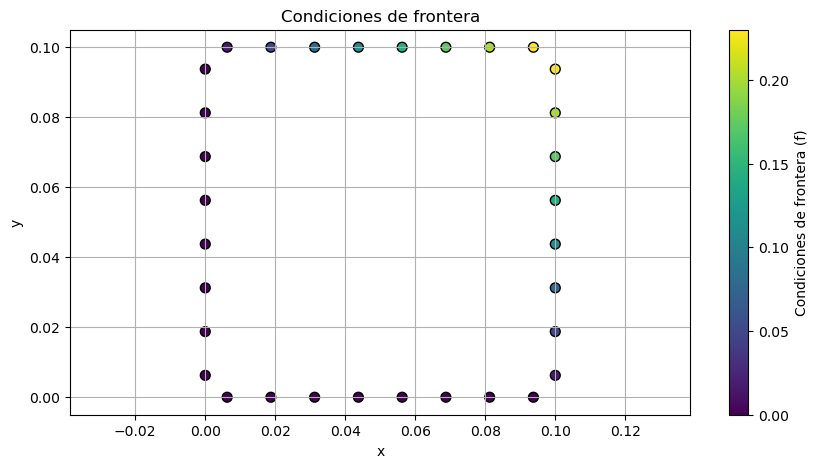

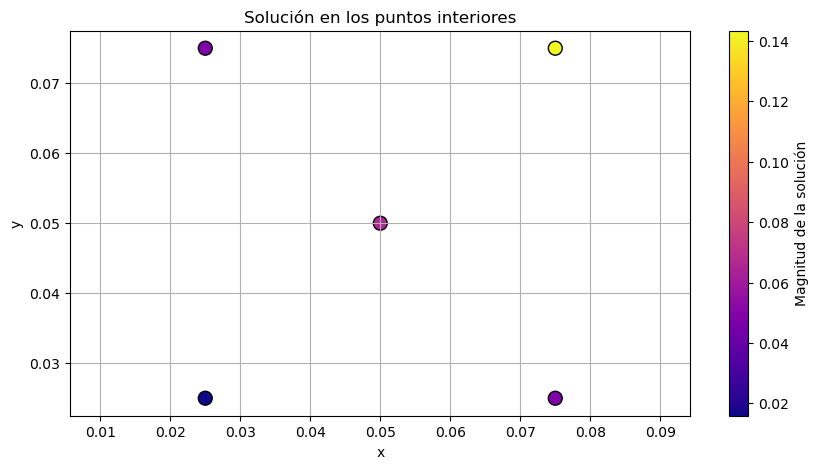

In [29]:
# Graficar las condiciones de frontera
boundary_x = solver.aCenters[:, 0]
boundary_y = solver.aCenters[:, 1]
boundary_values = boundaryCondition.f

plt.figure(figsize=(10, 5))
plt.scatter(boundary_x, boundary_y, c=boundary_values, cmap='viridis', s=50, edgecolor='k')
plt.colorbar(label='Condiciones de frontera (f)')
plt.title('Condiciones de frontera')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)
plt.show()

# Graficar la solución en los puntos interiores
interior_x = interiorPoints[:, 0]
interior_y = interiorPoints[:, 1]
interior_values = np.abs(interiorPhi)  # Magnitud de la solución

plt.figure(figsize=(10, 5))
plt.scatter(interior_x, interior_y, c=interior_values, cmap='plasma', s=100, edgecolor='k')
plt.colorbar(label='Magnitud de la solución')
plt.title('Solución en los puntos interiores')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)
plt.show()